## PART 1 - Machine Learning

- TASK 1.1 DATA PREPARATION

### Task 1.1 - Data Preparation
There are 99 rows and 11 dimensions in the dataset. The data is 100% dense. Features were not labelled, hence labels were provided when imported.
Task is to predict the number of containers a ship can carry. The target is known hence this is supervised learning.
From the inputs we want to get a output of the weighted sum : 𝑦 = 𝑓(𝑥𝑤)

Import necessary modules and Read data + add feature names
Call the head method to get a general overview of the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cols = ["IMO_NO.", "Vessel_Name", "Year_Built", "Gross_Tonnage", "Deadweight_Tonnage", "Length", "Beam", "Capacity_(TEU)", "Forward_Bays", "Center_Bays", "Aft_Bays"]
data = pd.read_csv('containers.csv',names=cols)
data.head()


,IMO_NO.,Vessel_Name,Year_Built,Gross_Tonnage,Deadweight_Tonnage,Length,Beam,Capacity_(TEU),Forward_Bays,Center_Bays,Aft_Bays
0,9260421,ANNA MAERSK,2003,93496,109000,352.60,42.80,8272,15,0,6
1,9461867,APL CHONGQING,2011,113735,122200,349.00,45.73,10106,15,0,5
2,9354404,BF EUPHORIA,2006,9962,11432,134.44,22.74,868,8,0,0
3,9343728,BREMEN EXPRESS,2008,93750,103567,335.06,42.87,8749,15,0,5
4,9314947,CAMELLIA,2006,28927,39200,222.15,30.04,2824,11,0,2


Explore the data
Describe the dataframe by summarize it by computing aggregations. We can do this by using the info method in Pandas. We can see that all data is non-null as expected and we have 8 numeric values, one target, and one String.

In [4]:
data.info()
data.describe()
data['IMO_NO.'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IMO_NO.             100 non-null    int64  
 1   Vessel_Name         100 non-null    object 
 2   Year_Built          100 non-null    int64  
 3   Gross_Tonnage       100 non-null    int64  
 4   Deadweight_Tonnage  100 non-null    int64  
 5   Length              100 non-null    float64
 6   Beam                100 non-null    float64
 7   Capacity_(TEU)      100 non-null    int64  
 8   Forward_Bays        100 non-null    int64  
 9   Center_Bays         100 non-null    int64  
 10  Aft_Bays            100 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 8.7+ KB


IMO_NO.
9314947    2
9260421    1
9298997    1
9454436    1
9631981    1
          ..
9619438    1
9618276    1
9444273    1
9236470    1
9795610    1
Name: count, Length: 99, dtype: int64

For each of these features, comparing the max and 75% values, we can start to see a huge difference in the Beam (Width) feature. This confirms that there may be an error with some of the tuples. 

We can also see that there is a duplicate IMO vessel listed. A further online shows that this is vessel was renamed, we will leave in this duplicate vessel.

Let us investigate further.

Extract the inputs (variables) and the targets from the dataset, this is the feature we trying to predict.

In [5]:
inputs = data.drop(columns=['IMO_NO.','Vessel_Name','Capacity_(TEU)']).to_numpy(int) #Input features
targets = data['Capacity_(TEU)'].to_numpy(int) #Prediction Target

Let’s have a quick look at the distribution of the Beam feature by plotting the histograms.

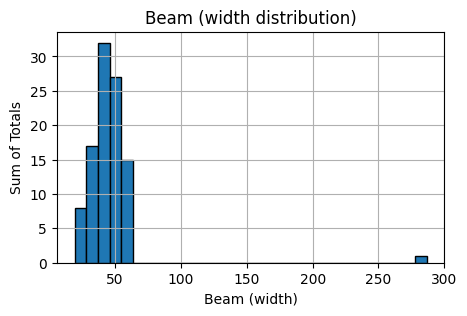

In [6]:

# for col in data.iloc[:,2:11]:
data['Beam'].hist(figsize=(5, 3), bins=30, edgecolor="black", )
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.title('Beam (width distribution)')
plt.xlabel('Beam (width)')
plt.ylabel("Sum of Totals")
plt.show()

In the above histogram we can spot one outlier which is the Beam (Width). 
We can plot a scatter plot to take a look at the ships beam vs length below.

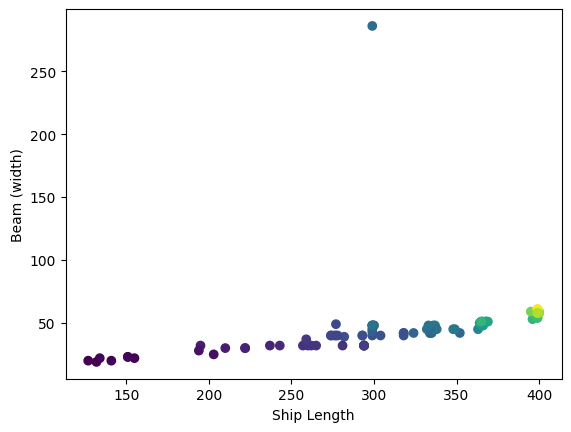

In [7]:
plt.figure()
plt.scatter(inputs[:,3], inputs[:,4], c=targets)
plt.xlabel("Ship Length")
plt.ylabel("Beam (width)")
plt.show()

Here we can see one ship has a length and width of 300x290 meters.  The outlier is identified as MSC Albany with IMO 9619438. Correct beam should be 48meters.

We can use common sense to deduce that the as the total number of bays should be in direct proportion to the ships total capacity. Let us plot this, below we can see that there is a gradual increase in the capacity as the Total bay count increases.

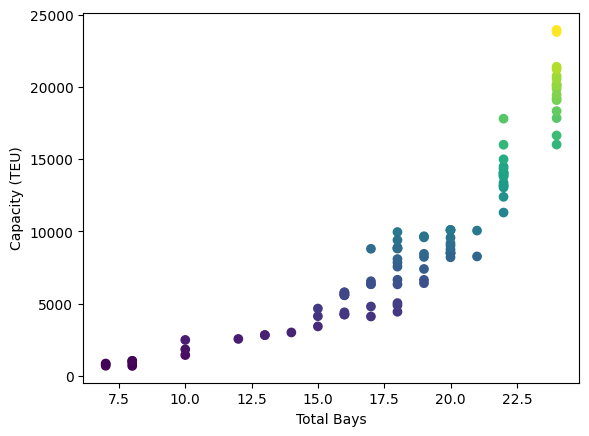

In [8]:
# Sum the total number of bays
totalbays = ['Forward_Bays', 'Center_Bays','Aft_Bays']
totalbays = data[totalbays].sum(axis=1)
plt.scatter(totalbays, targets, c=targets)
plt.xlabel("Total Bays")
plt.ylabel("Capacity (TEU)")
plt.show()

Now let us normalize the data to ensure that the values share a common scale, this will reduce complexity and optimize the data for machine learning.
In this case we will use the StandardScaler for Standardization.

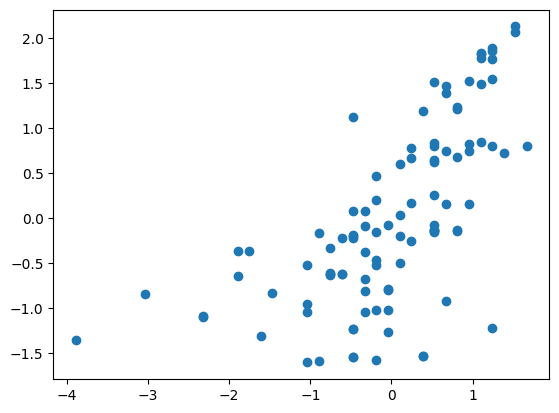

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# inputs
scaledInputs = scaler.fit_transform(inputs)
scaledInputs
plt.scatter(scaledInputs[:, 0], scaledInputs[:, 1])


- TASK 1.2 REGRESSION

<Axes: xlabel='Deadweight_Tonnage', ylabel='Capacity_(TEU)'>

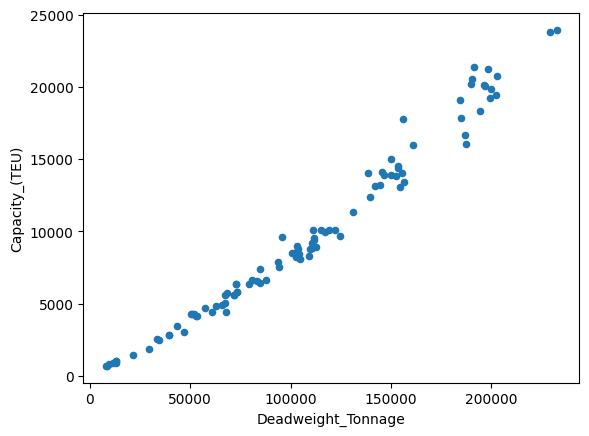

In [10]:
#Random Forest
# data.plot(kind='scatter', x='Dearweight_Tonnage', y='Capacity_(TEU)')

data.plot(kind = 'scatter', x = 'Deadweight_Tonnage', y = 'Capacity_(TEU)')


Above we can see there is a postive linear relationship between the feature 'Deadweight_Tonnage' and the target prediction (Capacity). This means that as teh ships tonnage increase, there is a postive increase in capacity.

Split the data (training & testing)
75% Training data (Default)
25% Testing data (Default)

In [11]:
from sklearn.model_selection import train_test_split
X = scaledInputs
y = targets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
print(y_train)

[ 6655  5782 21237 13806 18340   809 14052 20170 14500  4132  5041  7849
  9012  5576 13386 10106  9572  6418  9178  2824   850 10062  1438  6336
  4255 21413  1036  8272  4254  4803  5606  2824  8800  7564  1835  5782
  8827  9669  8212 13050 20038  8886 19870   686 19472  8533  6350  3005
 23820 20568  9403 17816 20182 13892 13900  6648  8089 13208  4437  5711
  9962   698  6554 19224 15000 16652  8238  7403 14080  2487 23964 17859
  8452 11312  3424]


Random Forrest

In [42]:
#Regression model random forest
from sklearn.ensemble import RandomForestRegressor
#Make an instance of the model
rfc = RandomForestRegressor(n_estimators=100, random_state=0)
# Train the model on the data (X = Features, Y = Capacity (target))
rfc.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Predict the labels of new data (new containers in the test split)

In [30]:
y_pred = rfc.predict(X_test)

Measure the model performance

In [41]:
score = rfc.score(X_, y_test)
score

NameError: name 'X_' is not defined

Show a datatable comparing the differences.


Neural Network - Using MLPRegressor

In [40]:
from sklearn.neural_network import MLPRegressor
import numpy as np
# regressor = MLPRegressor()
regressor = MLPRegressor(hidden_layer_sizes=(100,), activation="relu", solver="sgd", max_iter=500, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
# print(np.mean(abs(outputs-targets)))

C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached

ValueError: Solver produced non-finite parameter weights. The input data may contain large values and need to be preprocessed.

Support Vector Machine


In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([8539.54640537, 8562.62429541, 8531.15648768, 8528.08838048,
       8559.63008818, 8560.62451042, 8534.99587527, 8561.34712057,
       8535.60395367, 8561.65671613, 8525.03228603, 8561.61414564,
       8557.32406705, 8531.93560829, 8525.55797012, 8528.52143878,
       8540.74939861, 8526.98462759, 8535.95108544, 8533.00673038,
       8526.48547905, 8529.76001115, 8534.21016795, 8559.32390677,
       8525.41628526])

check the ERROS

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the MSE, RMSE, and MAE scores
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the scores
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 score: ", r2)


MSE:  28971167.347391065
RMSE:  5382.487096816031
MAE:  4349.269412754497
R2 score:  -0.008505817165157303


Produce a decision tree

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
fig,axes = plt.subplots(nrows= 1, ncols=1, figsize=(4,4), dpi=600)
tree.plot_tree(rfc.estimators_)


Show Feature importance

In [ ]:
importance = pd.DataFrame({'feature':X_train,'importance':np.round(rfc.feature_importances_,3)})


Randomize the data (even though it looks like the are in no particuilar order). This is to be sure the train-test split has a even number of data from all capacities

In [ ]:
I = np.random.permutation(inputs)
I

Evaluate the Accuracy

In [ ]:
acc_train = metrics.

Show a decision tree to better understand the model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


